In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(r'E:\Info_Srping\FWI_Prediction\Data\\processed\filtered_data.csv')
df

,Unnamed: 0,report_date,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,visibility,precipitation,...,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,daily_severity_rating,country,latitude,longitude,elevation
0,0,2019-08-27 12:00:00,12.0,7.6,74.4,3.925709,0,1015.13,30.0,2.6,...,2.457888,9.611623,3.237171,0.9,-0.481941,0.0,United Kingdom,54.502224,-2.68500,252.0
1,1,2018-06-06 12:00:00,11.1,1.7,52.0,5.522161,200,1010.80,38.6,1.5,...,3.790031,13.626781,4.796346,1.7,1.115939,0.2,Canada,55.200000,-119.40000,745.0
2,2,2014-10-11 12:00:00,2.9,2.3,95.0,0.718170,250,1018.19,27.7,0.0,...,1.300114,23.135258,2.325270,0.1,-4.164481,0.0,Canada,49.820000,-74.98000,381.1
3,3,2015-09-11 12:00:00,22.1,11.1,49.8,3.398300,267,1015.79,23.9,0.0,...,3.306651,21.593404,4.668692,3.8,2.291750,0.7,Canada,54.280000,-111.45000,619.0
4,4,2016-06-22 12:00:00,17.0,10.0,63.6,6.985122,260,1016.70,16.1,0.0,...,8.640212,27.371547,10.226901,15.6,6.230271,25.4,United States,37.618805,-122.37542,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085123,1183935,2012-09-19 12:00:00,22.5,15.4,63.0,6.985122,180,1016.90,10.1,0.0,...,3.322340,6.956718,3.445814,16.9,3.914798,3.8,Canada,45.230000,-63.06000,23.5
1085124,1183936,2011-08-01 12:00:00,17.4,12.1,70.0,5.535256,300,1018.30,49.7,0.0,...,4.447573,23.262788,5.980500,6.1,3.467852,2.5,Canada,49.350000,-124.16000,14.5
1085125,1183937,2017-07-09 12:00:00,21.0,15.0,68.7,4.116377,200,1014.50,14.5,0.0,...,2.022931,13.830126,3.049226,2.1,0.629397,0.1,Canada,43.628613,-79.39500,76.8
1085126,1183938,2010-04-24 12:00:00,16.2,-1.4,31.0,5.994783,220,1016.50,48.3,0.0,...,3.414357,6.054161,3.528050,15.3,3.807533,3.4,Canada,45.466667,-73.75000,36.0


In [7]:
df.columns

Index(['Unnamed: 0', 'report_date', 'temperature', 'dew_point_temperature',
       'relative_humidity', 'wind_speed', 'wind_direction',
       'atmospheric_pressure', 'visibility', 'precipitation', 'rain_days',
       'snow_on_ground', 'fine_fuel_moisture_code', 'duff_moisture_code',
       'drought_code', 'build_up_index', 'initial_spread_index',
       'fire_weather_index', 'daily_severity_rating', 'country', 'latitude',
       'longitude', 'elevation'],
      dtype='object')

In [8]:
data = df.drop(columns=['Unnamed: 0', 'report_date', 'visibility', 'daily_severity_rating', 
                         'country', 'latitude', 'longitude', 'elevation'])


In [9]:
data

,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,precipitation,rain_days,snow_on_ground,fine_fuel_moisture_code,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index
0,12.0,7.6,74.4,3.925709,0,1015.13,2.6,0,0.0,48996.018055,2.457888,9.611623,3.237171,0.9,-0.481941
1,11.1,1.7,52.0,5.522161,200,1010.80,1.5,0,0.0,53705.968643,3.790031,13.626781,4.796346,1.7,1.115939
2,2.9,2.3,95.0,0.718170,250,1018.19,0.0,2,0.0,17111.978362,1.300114,23.135258,2.325270,0.1,-4.164481
3,22.1,11.1,49.8,3.398300,267,1015.79,0.0,4,0.0,112385.086604,3.306651,21.593404,4.668692,3.8,2.291750
4,17.0,10.0,63.6,6.985122,260,1016.70,0.0,1,0.0,115394.441390,8.640212,27.371547,10.226901,15.6,6.230271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085123,22.5,15.4,63.0,6.985122,180,1016.90,0.0,2,0.0,117685.425508,3.322340,6.956718,3.445814,16.9,3.914798
1085124,17.4,12.1,70.0,5.535256,300,1018.30,0.0,10,0.0,107604.307479,4.447573,23.262788,5.980500,6.1,3.467852
1085125,21.0,15.0,68.7,4.116377,200,1014.50,0.0,1,0.0,91424.833901,2.022931,13.830126,3.049226,2.1,0.629397
1085126,16.2,-1.4,31.0,5.994783,220,1016.50,0.0,3,0.0,127953.854545,3.414357,6.054161,3.528050,15.3,3.807533


In [14]:
data.columns

Index(['temperature', 'dew_point_temperature', 'relative_humidity',
       'wind_speed', 'wind_direction', 'atmospheric_pressure', 'precipitation',
       'rain_days', 'snow_on_ground', 'fine_fuel_moisture_code',
       'duff_moisture_code', 'drought_code', 'build_up_index',
       'initial_spread_index', 'fire_weather_index'],
      dtype='object')

In [15]:
data = data.drop(columns=['precipitation', 'dew_point_temperature', 'snow_on_ground'])


Explained variance ratios: [0.44611679 0.11814373]


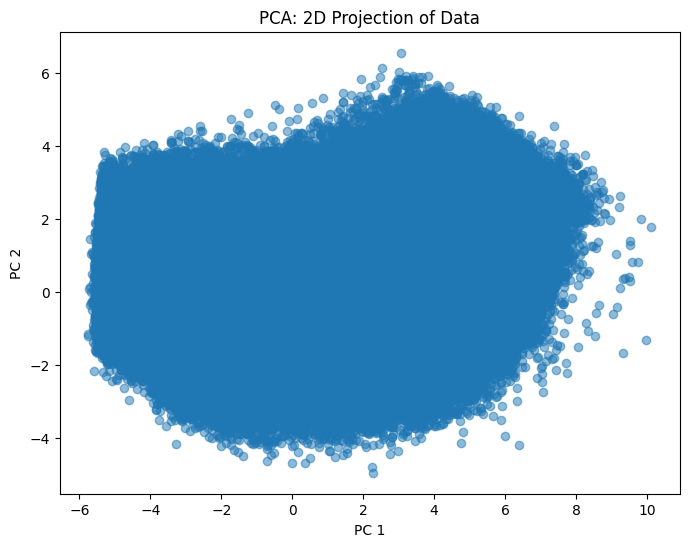

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numeric features and scale
numeric_cols = data.select_dtypes(include='number').columns
X = data[numeric_cols].fillna(data[numeric_cols].median())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance
print("Explained variance ratios:", pca.explained_variance_ratio_)

# Plot the 2D PCA projection
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA: 2D Projection of Data')
plt.savefig('PCA.png')
plt.show()

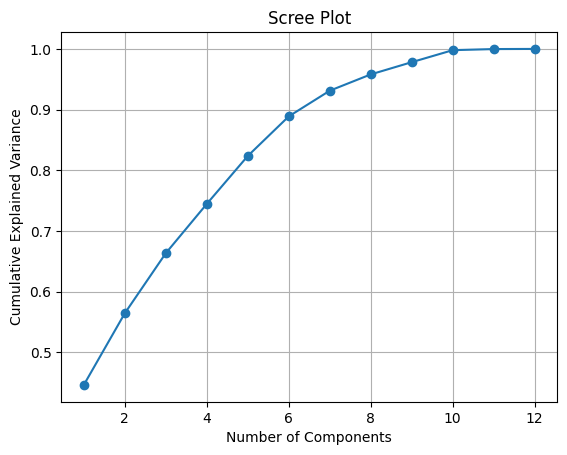

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

numeric_cols = data.select_dtypes(include='number').columns
X = data[numeric_cols].fillna(data[numeric_cols].median())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA().fit(X_scaled)  
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.savefig('Scree_Plot.png')
plt.show()


PCA Loadings:
                              PC1       PC2       PC3       PC4       PC5  \
temperature              0.252891 -0.024527  0.009628 -0.256714 -0.602896   
relative_humidity       -0.318242 -0.131639  0.315841  0.216918  0.154703   
wind_speed               0.038447  0.678908  0.182139  0.313501  0.223336   
wind_direction           0.018158  0.276241  0.179553 -0.822940  0.414987   
atmospheric_pressure     0.008676 -0.218961 -0.700542 -0.055558  0.425036   
rain_days                0.217462 -0.004167 -0.160120  0.286012  0.294801   
fine_fuel_moisture_code  0.380598  0.078471 -0.246753 -0.039618 -0.090636   
duff_moisture_code       0.383808 -0.226055  0.195507  0.015705  0.080495   
drought_code             0.273073 -0.319514  0.387403  0.065120  0.304068   
build_up_index           0.381242 -0.255474  0.243839  0.021648  0.119226   
initial_spread_index     0.324248  0.397835 -0.069386  0.138031 -0.037521   
fire_weather_index       0.410342  0.118302 -0.069849  0.03262

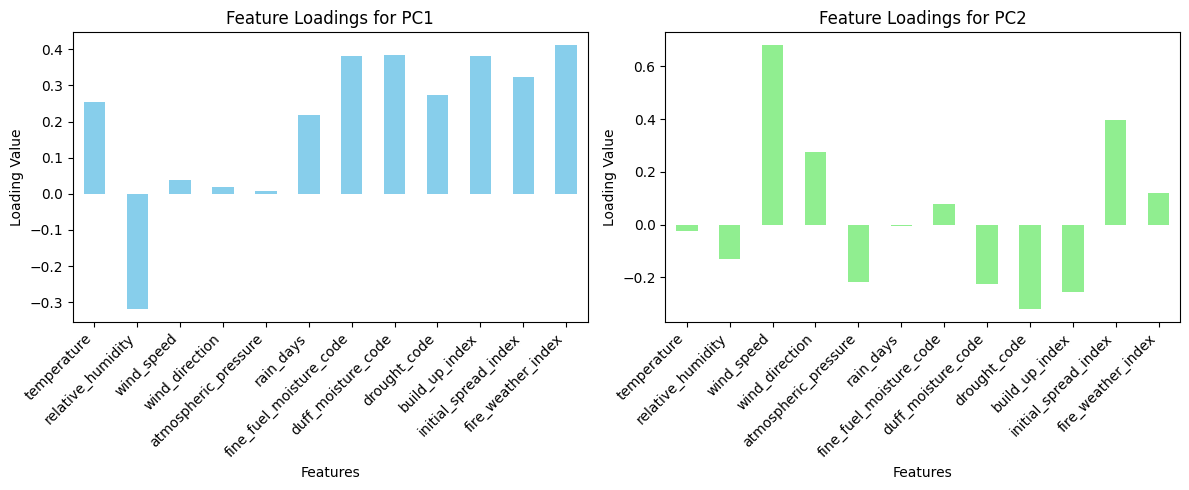

In [21]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Select numeric features (adjust as needed)
numeric_cols = data.select_dtypes(include='number').columns
X = data[numeric_cols].fillna(data[numeric_cols].median())

# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA (let's keep all components)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 4: Create DataFrame of PCA loadings
feature_names = numeric_cols
loadings = pca.components_
loading_df = pd.DataFrame(loadings.T, index=feature_names, 
                          columns=[f'PC{i+1}' for i in range(loadings.shape[0])])

# Display the loadings DataFrame
print("PCA Loadings:")
print(loading_df)

# Step 5: Find top 5 contributors (highest absolute loadings) for PC1 and PC2
top_pc1 = loading_df['PC1'].abs().sort_values(ascending=False).head(5)
top_pc2 = loading_df['PC2'].abs().sort_values(ascending=False).head(5)

print("\nTop 5 contributors to PC1:")
print(top_pc1)

print("\nTop 5 contributors to PC2:")
print(top_pc2)

# Step 6 (Optional): Bar plots of loadings for PC1 and PC2
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
loading_df['PC1'].plot(kind='bar', color='skyblue')
plt.title('Feature Loadings for PC1')
plt.ylabel('Loading Value')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')

plt.subplot(1,2,2)
loading_df['PC2'].plot(kind='bar', color='lightgreen')
plt.title('Feature Loadings for PC2')
plt.ylabel('Loading Value')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('feature_loading.png')
plt.show()


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


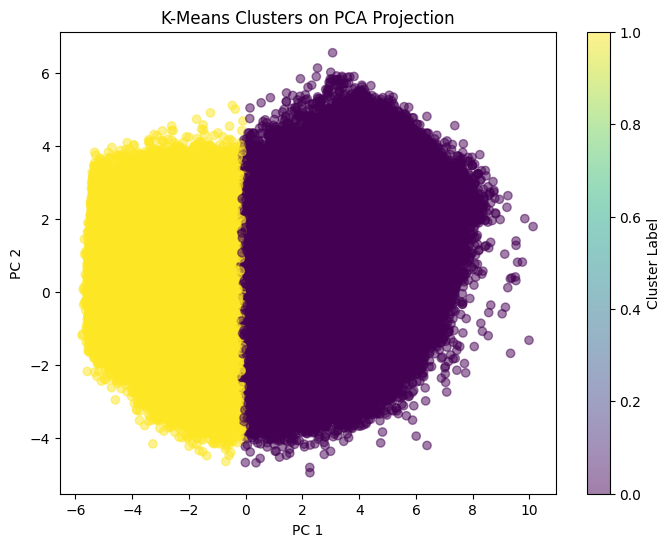

In [28]:
from sklearn.cluster import KMeans


numeric_cols = data.select_dtypes(include='number').columns
X = data[numeric_cols].fillna(data[numeric_cols].median())

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('K-Means Clusters on PCA Projection')
plt.colorbar(label='Cluster Label')
plt.savefig('cluster_loading.png')
plt.show()


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

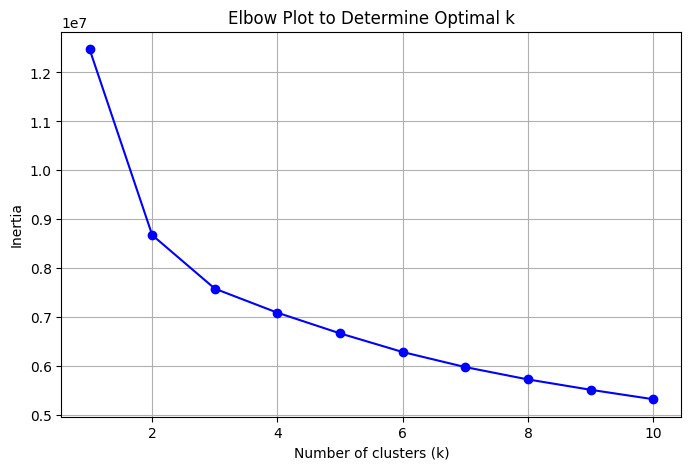

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Use your PCA-transformed data (e.g., first several PCs)
X_input = X_pca[:, :8]  # adjust number of PCs as needed

k_values = range(1, 11)  # Try from 1 to 10 clusters
inertia_vals = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_input)
    inertia_vals.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia_vals, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot to Determine Optimal k')
plt.grid(True)
plt.savefig('Elbow_Plot_to_Determine_Optimal_k.png')
plt.show()


In [26]:
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster_label'] = kmeans.fit_predict(X_input)

print(data.groupby('cluster_label').mean())        # Mean of all variables by cluster
print(data.groupby('cluster_label')['fire_weather_index'].describe())  # FWI stats by cluster



C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


               temperature  relative_humidity  wind_speed  wind_direction  \
cluster_label                                                               
0                20.343840          46.653778    4.263397      201.138938   
1                13.186537          71.486163    4.126054      196.489630   

               atmospheric_pressure  rain_days  fine_fuel_moisture_code  \
cluster_label                                                             
0                       1014.929353   3.740563            117523.125532   
1                       1014.534687   0.745819             51628.324408   

               duff_moisture_code  drought_code  build_up_index  \
cluster_label                                                     
0                        5.444713     21.325543        6.786941   
1                        2.176688     13.789771        3.042872   

               initial_spread_index  fire_weather_index  
cluster_label                                            
0    

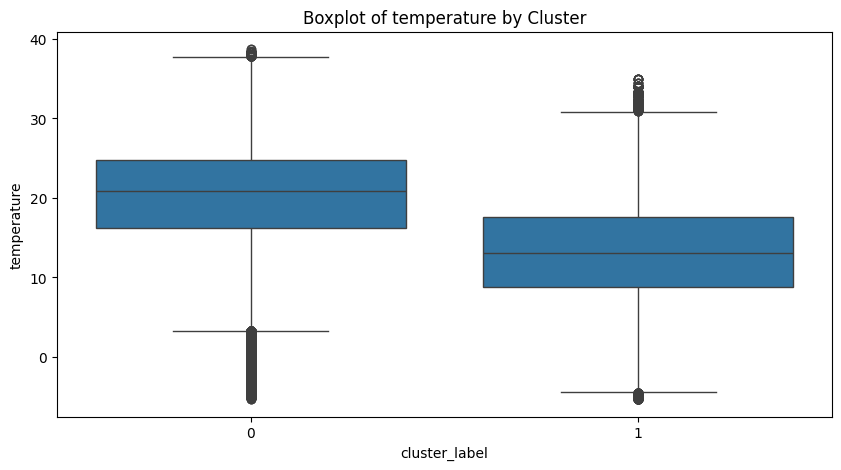

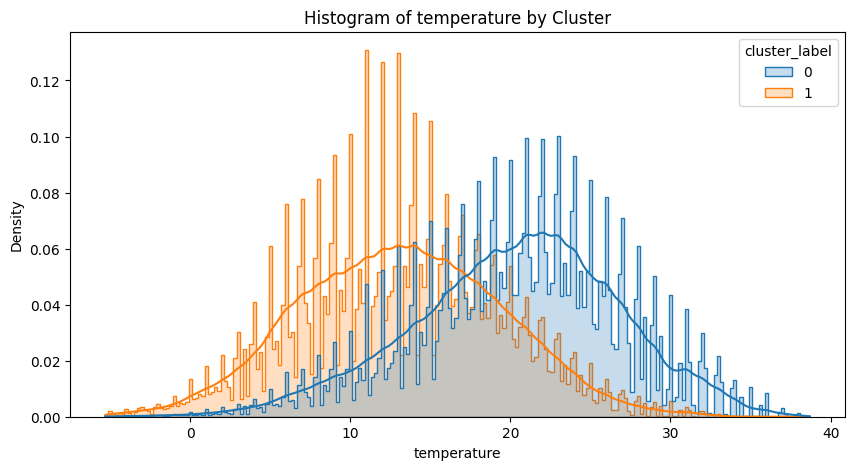

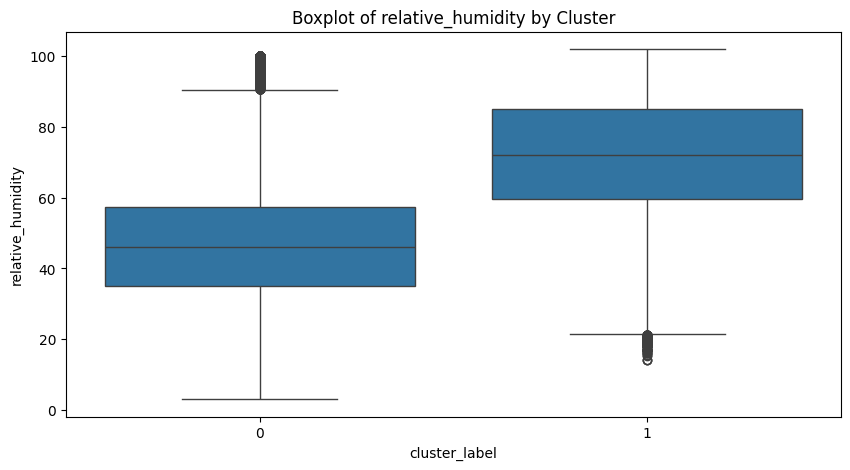

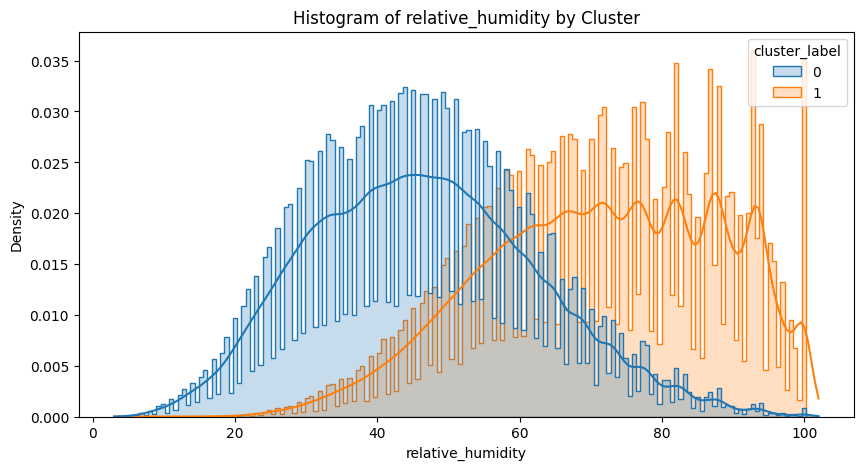

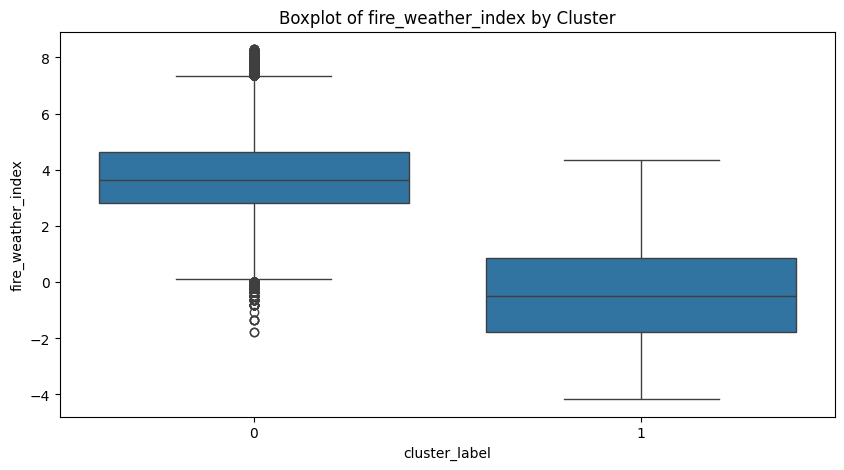

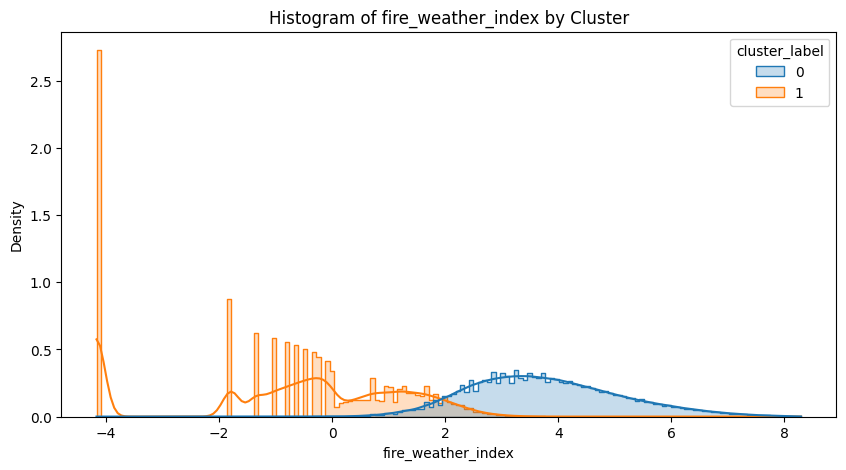

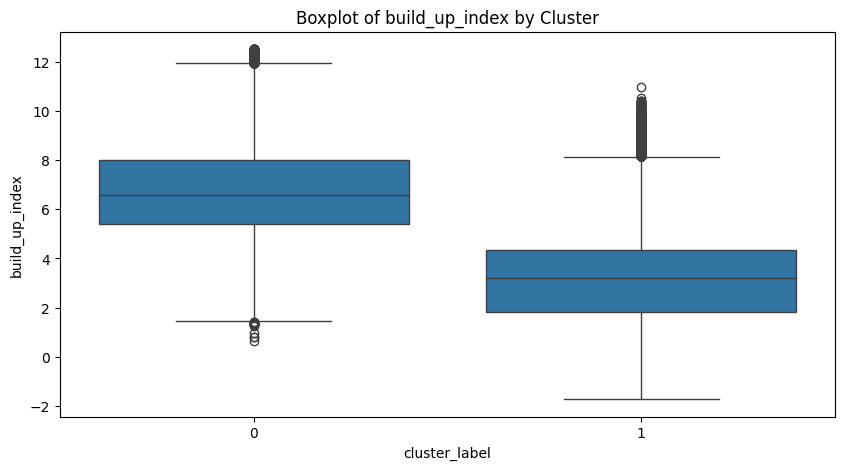

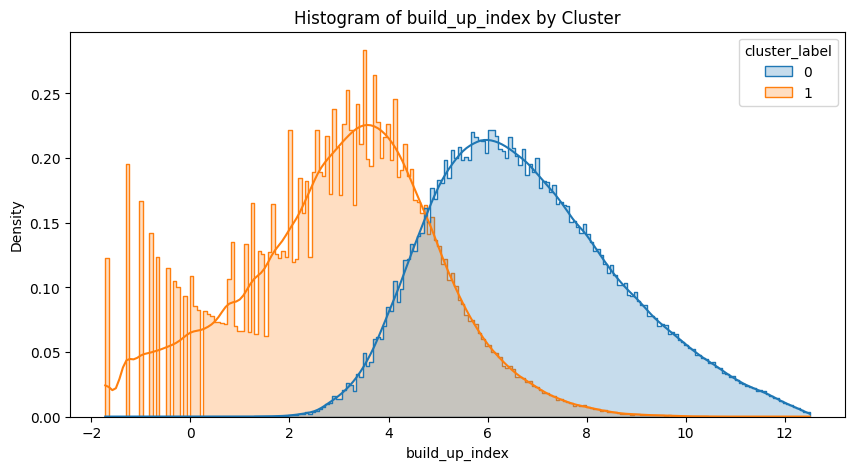

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to visualize (adjust as needed)
features = ['temperature', 'relative_humidity', 'fire_weather_index', 'build_up_index','initial_spread_index']

for feature in features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='cluster_label', y=feature, data=data)
    plt.title(f'Boxplot of {feature} by Cluster')
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.histplot(data, x=feature, hue='cluster_label', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'Histogram of {feature} by Cluster')

    
    plt.show()
